In [1]:
using PyPlot
PyPlot.matplotlib[:style][:use]("Solarize_Light2")

# Complex numbers in Julia

In [3]:
z = 0.5 + sqrt(3) / 2 * im

0.5 + 0.8660254037844386im

In [4]:
typeof(z)

Complex{Float64}

Magnitude of a complex number

In [5]:
abs(z)

1.0

Angle of a complex number

`angle(z)` returns units in radians

In [6]:
angle(z) * 180.0 / pi

59.99999999999999

# Bode plots for a general transfer function

Consider:

\begin{equation}
    G(s) = \frac{5(0.5 s + 1)e^{-0.5s}}{(20s+1)(4s+1)}
\end{equation}

We need to handle the time delay in $G(s)$ separately since, computationally, `atan2` will always give an angle (phase shift) between $\pi/2$ and $-\pi /2$ thus cannot capture the large phase shifts generated by time delays.

So $G(s)=\hat{G}(s)e^{-0.5s}$ where:
\begin{equation}
    \hat{G}(s) = \frac{5(0.5 s + 1)}{(20s+1)(4s+1)}
\end{equation}

In [7]:
function G_hat(s::Complex{Float64}) # takes complex number as input
    return 5.0 * (0.5 * s + 1) / ((20 * s + 1) * (4 * s + 1)) # excludes time delay
end

G_hat (generic function with 1 method)

Define array of $\omega$'s for plotting

In [8]:
ω = logspace(-2, 2.0)

50-element Array{Float64,1}:
   0.01     
   0.0120679
   0.0145635
   0.0175751
   0.0212095
   0.0255955
   0.0308884
   0.0372759
   0.0449843
   0.0542868
   0.0655129
   0.0790604
   0.0954095
   ⋮        
  12.6486   
  15.2642   
  18.4207   
  22.23     
  26.827    
  32.3746   
  39.0694   
  47.1487   
  56.8987   
  68.6649   
  82.8643   
 100.0      

Find $\hat{G}(i\omega)$ for all of these $\omega$'s.

In [9]:
G_at_ωi = G_hat.(ω * im)

50-element Array{Complex{Float64},1}:
      4.76737-1.12819im    
       4.6671-1.33714im    
      4.52715-1.57262im    
      4.33527-1.82991im    
      4.07854-2.09859im    
      3.74604-2.36091im    
      3.33322-2.59158im    
      2.84684-2.76051im    
      2.30831-2.8393im     
      1.75231-2.80979im    
      1.21954-2.67072im    
     0.746651-2.43838im    
     0.358271-2.14105im    
             ⋮             
 -0.000331895-0.0024787im  
 -0.000227931-0.00205187im 
 -0.000156525-0.00169907im 
 -0.000107486-0.00140725im 
  -7.38088e-5-0.00116572im 
  -5.06825e-5-0.000965745im
  -3.48019e-5-0.000800133im
  -2.38971e-5-0.000662953im
  -1.64091e-5-0.000549311im
  -1.12674e-5-0.000455159im
  -7.73676e-6-0.000377151im
  -5.31246e-6-0.000312516im

Get the amplitude ratio and phase shift at each of the $\omega$'s.

* the time delay does not influence the amplitude
* the time delay induces a phase shift of $-\omega \theta$ where $\theta$ is the time shift.

In [10]:
amplitude_ratio = abs.(G_at_ωi)
phase_shift = angle.(G_at_ωi) .- ω * (0.5)

50-element Array{Float64,1}:
  -0.237374
  -0.285063
  -0.341617
  -0.408198
  -0.48582 
  -0.575157
  -0.676314
  -0.788642
  -0.910678
  -1.04031 
  -1.1752  
  -1.31318 
  -1.4527  
   ⋮       
  -8.02818 
  -9.31352 
 -10.873   
 -12.762   
 -15.0475  
 -17.8105  
 -21.149   
 -25.1812  
 -30.05    
 -35.928   
 -43.0234  
 -51.5878  

# Make the Bode plots.

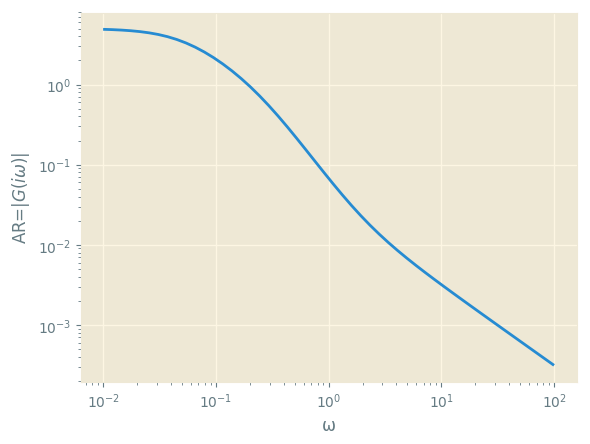

In [11]:
plot(ω, amplitude_ratio)
xlabel("ω")
ylabel("AR=\$|G(i\\omega)|\$")
xscale("log")
yscale("log")

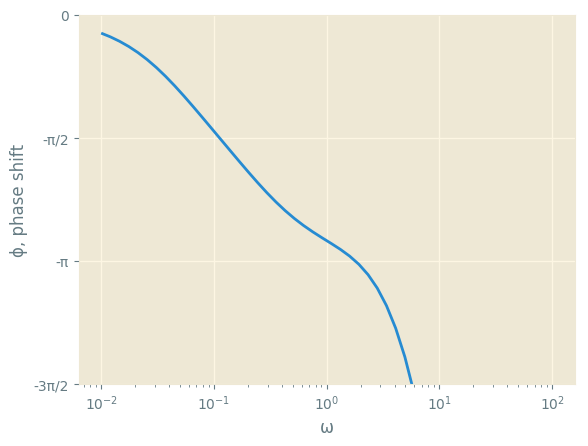

(-4.71238898038469, 0.0)

In [12]:
plot(ω, phase_shift)
xlabel("ω")
ylabel("ϕ, phase shift")
xscale("log")
yticks([0.0, -π/2, -π, -3 * π/ 2],
       ["0", "-π/2", "-π", "-3π/2"])
ylim([-3 * π / 2, 0])